In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
%run BREPpy.py

import pdb

conn = Connector()
conn.init_from_script(['--config_fn','./input_files/Parameters.hoc',
                       '--goc_points_fn', './example_simulation/coordinates_input/GoCcoordinates.dat',
                      '--gc_points_fn', './example_simulation/coordinates_input/GCcoordinates.dat'])


p1 = './example_simulation/coordinates_input/'
p2 = './example_simulation/coordinates_input/subsampled/'

go_ori = p1+'GoCcoordinates.dat'
gr_ori = p1+'GCcoordinates.dat'
go_32 = p2+'GoCcoordinates_32.dat'
gr_32 = p2+'GCcoordinates_32.dat'
go_16 = p2+'GoCcoordinates_16.dat'
gr_16 = p2+'GCcoordinates_16.dat'
go_4 = p2+'GoCcoordinates_4.dat'
gr_4 = p2+'GCcoordinates_4.dat' 


empty_hoc = dir(neuron.hoc.HocObject()).copy()
config_fn = './input_files/Parameters.hoc'
neuron.h.xopen(config_fn)

#pdb.set_trace()


# Set up the Golgi population, render dendrites
gg = Golgi_pop(h)
gg.load_somata(go_32)
gg.add_dendrites()


#Set up Granule population including aa and pf
gp = Granule_pop(h)
gp.load_somata(gr_32)
gp.add_aa_endpoints_fixed()
gp.add_pf_endpoints()

#Build connector and obtain the connections
cc = Connect_2D(gg.qpts, gp.qpts_aa, 15)
l1,r1 = cc.query_pts_in_lin()
l2,r2 = cc.query_lin_in_pts()
cc.save_results(l1,r1, 'first_test/pts_in_lin_aa_')
cc.save_results(l2,r2, 'first_test/lin_in_pts_aa_', query_is_lin=True)

cc = Connect_2D(gg.qpts, gp.qpts_pf, 15)
l1,r1 = cc.query_pts_in_lin()
l2,r2 = cc.query_lin_in_pts()
cc.save_results(l1,r1, 'first_test/pts_in_lin_pf')
cc.save_results(l2,r2, 'first_test/lin_in_pts_pf', query_is_lin=True)

gg.save_dend_coords ('first_test/')
gg.save_somata ('first_test/', 'GoCcoordinates.dat')

gp.save_gct_points('first_test/')
gp.save_somata('first_test/', 'GCcoordinates.dat')

#save a

In [127]:
cc.save_results(l2,r2, 'first_test/lin_in_pts_pf', query_is_lin=True)

In [ ]:
a = True
p

In [73]:
so = gg.qpts.seg

print (sg.shape)

dist_info = False

titles = ['AA', 'PF']

fc = so[:,0]
sc = so[:,1]
print ('First')
for i in np.unique(fc):
    idx = np.isclose(fc, i)
    if dist_info: print (i, ': n =', sum(idx), ', corresponding mean distance:', np.mean(dis_f[n][idx]))
    else: print (i, ': n =', sum(idx))
print ('Second')
for i in np.unique(sc):
    idx = np.isclose(sc, i)
    if dist_info: print (i, ': n =', sum(idx), ', corresponding mean distance:', np.mean(dis_f[n][idx]))
    else: print (i, ': n =', sum(idx))

(2220, 2)
First
1.0 : n = 540
2.0 : n = 540
3.0 : n = 540
4.0 : n = 300
5.0 : n = 300
Second
1.0 : n = 360
2.0 : n = 360
3.0 : n = 750
4.0 : n = 750


In [120]:
%run BREPpy.py
gg = Golgi_pop(h)
gg.load_somata(go_32)
gg.add_dendrites()
gg.save_dend_coords('teeeeest_')

In [115]:
%run BREPpy.py

gp = Granule_pop(h)
gp.load_somata(gr_32)
gp.save_gct_points('teeeeest_')
gp.add_aa_endpoints_fixed()
gp.add_pf_endpoints()
gp.save_gct_points('teeeeest_')


AssertionError: No ascending axons added yet

In [109]:
ad = gg.a_dend
print (ad.shape)
nn = ad[1]
#print (nn)
print (ad.ravel().shape)

(30, 50, 3)
(4500,)


In [38]:
seg2 = seg.copy()

In [89]:
t = np.array([1,2])
print (str(t))

[1 2]


In [110]:
warnings.warn?


In [95]:
r1, lr1 = cc.query_pts_in_lin()

In [96]:
% run BREPpy.py
cc = Connect_2D(gg.qpts, gp.qpts_aa, 15)
cc.save_results(r1, lr1, 'test_AA')


In [101]:
print (gp.aa_dots.shape)

print (gp.aa_dots[:2, :, :])
print (gp.aa_dots[:2, -1, :])

 

(13112, 2, 3)
[[[ 163.   44.  192.]
  [ 163.   44.  422.]]

 [[  18.   89.    1.]
  [  18.   89.  231.]]]
[[ 163.   44.  422.]
 [  18.   89.  231.]]


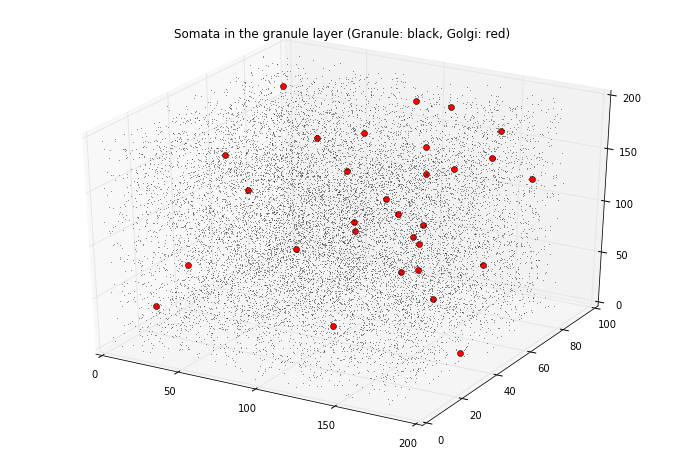

In [4]:
#%run BREPpy.py
plt.figure(figsize = (12,8))

gg.plot_somata(False, 'ro')
gp.plot_somata(False, 'k.', markersize = 0.5)
plt.title ('Somata in the granule layer (Granule: black, Golgi: red)');

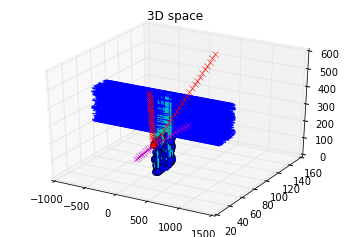

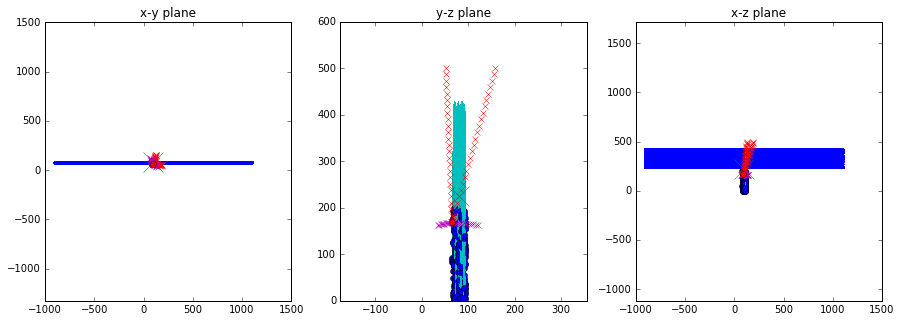

In [16]:
## plot some full cells

#Different populations
gr_pop = gp
go_pop = gg

m = 1254
#print (gg.qpts.idx[m])

#Get all Granule cells that are attached to one Golgi cell point (r1 comes from query_pts_in_lin)
go_cells = gg.qpts.idx[m]   #indices for the Golgi population
gr_cells =r1[m] #indices for the Granule cell population
q_pt =gg.qpts.coo[m]     # special (query?) points


# 3D plot
plt.figure()
ax = plt.gcf().gca(projection='3d')
def plot3d (ax, dat, *args, **kwargs):
    if dat == []: return
    if len(dat.shape) == 1: #if single dot
        dat = np.expand_dims(dat, axis = 0)
    ax.plot(dat[:,0], dat[:,1], dat[:,2], *args, **kwargs)

for c in gr_cells:
    plot3d(ax, gr_pop.aa_dots[c], 'c')
    plot3d(ax, gr_pop.pf_dots[c], 'b')
    plot3d(ax, gr_pop.som[c], 'bo')

for c in go_cells:
    plot3d(ax, go_pop.a_dend[c], 'rx')
    plot3d(ax, go_pop.b_dend[c], 'mx')
    plot3d(ax, np.expand_dims(go_pop.som[c], axis = 0), 'ro')

    plot3d(ax, q_pt, 'gx', markersize = 2)

    plt.title('3D space')
    
#2D projections
plt.figure(figsize=(15,5))
for i, [j, k, tit] in enumerate([[0,1, 'x-y plane'], [1,2, 'y-z plane'], [0,2, 'x-z plane']]):
    
    plt.subplot(1,3,i+1)
    
    for c in gr_cells:
        plt.plot(gr_pop.aa_dots[c,:,j], gr_pop.aa_dots[c,:,k], 'c')
        plt.plot(gr_pop.pf_dots[c,:,j], gr_pop.pf_dots[c,:,k], 'b')
        plt.plot(gr_pop.som[c,j], gr_pop.som[c,k], 'bo')

    for c in go_cells:
        plt.plot(go_pop.a_dend[c,:,j], go_pop.a_dend[c,:,k], 'rx')
        plt.plot(go_pop.b_dend[c,:,j], go_pop.b_dend[c,:,k], 'mx')
        plt.plot(go_pop.som[c,j], go_pop.som[c,k], 'ro')
        
    if len(q_pt) > 0: plt.plot(q_pt[j], q_pt[k], 'gx', markersize = 20)
    
    
    if True:
        if i in [0,2]: plt.xlim([-100, 500])
    plt.title (tit)
    
    
    plt.axis('equal')

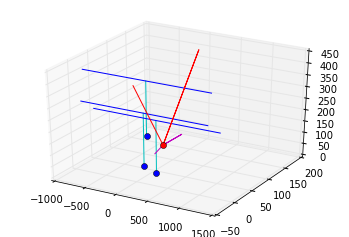

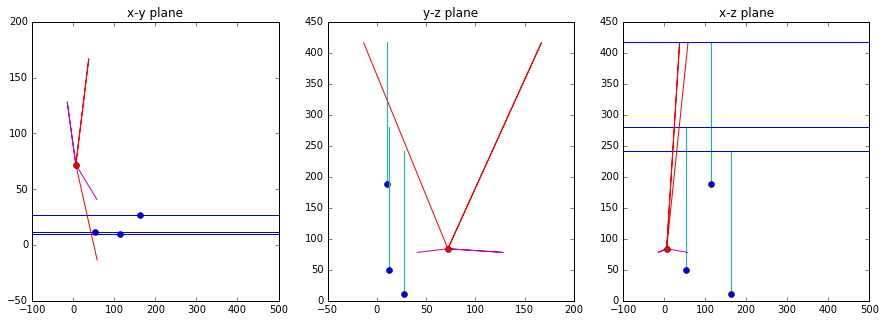

In [32]:
## plot some full cells
import matplotlib.pyplot as plt
%matplotlib inline

gr_pop = gp
go_pop = gg

a = np.random.randint(0, len(r2[0]), 5)
#ex = r2[a]


gr_cells = r2[0] #np.random.randint(0, len(gr_pop.som), 10)
go_cells = [0] #np.random.randint(0, len(go_pop.som), 2)


# 3D plot
plt.figure()
ax = plt.gcf().gca(projection='3d')
def plot3d (ax, dat, *args, **kwargs):
    if len(dat.shape) == 1: #if single dot
        dat = np.expand_dims(dat, axis = 0)
    ax.plot(dat[:,0], dat[:,1], dat[:,2], *args, **kwargs)

for c in gr_cells:
    plot3d(ax, gr_pop.aa_dots[c], 'c')
    plot3d(ax, gr_pop.pf_dots[c], 'b')
    plot3d(ax, gr_pop.som[c], 'bo')

for c in go_cells:
    plot3d(ax, go_pop.a_dend[c], 'r')
    plot3d(ax, go_pop.b_dend[c], 'm')
    plot3d(ax, np.expand_dims(go_pop.som[c], axis = 0), 'ro')
    
    
#2D projections
plt.figure(figsize=(15,5))
for i, [j, k, tit] in enumerate([[0,1, 'x-y plane'], [1,2, 'y-z plane'], [0,2, 'x-z plane']]):
    
    plt.subplot(1,3,i+1)
    
    for c in gr_cells:
        plt.plot(gr_pop.aa_dots[c,:,j], gr_pop.aa_dots[c,:,k], 'c')
        plt.plot(gr_pop.pf_dots[c,:,j], gr_pop.pf_dots[c,:,k], 'b')
        plt.plot(gr_pop.som[c,j], gr_pop.som[c,k], 'bo')

    for c in go_cells:
        plt.plot(go_pop.a_dend[c,:,j], go_pop.a_dend[c,:,k], 'r')
        plt.plot(go_pop.b_dend[c,:,j], go_pop.b_dend[c,:,k], 'm')
        plt.plot(go_pop.som[c,j], go_pop.som[c,k], 'ro')
    
    if True:
        if i in [0,2]: plt.xlim([-100, 500])
    plt.title (tit)

In [ ]:
qpt = Query_points(gg.som)

qpt.npts

In [ ]:
from neuron import hoc, h

%run BREPpy.py


empty_hoc = dir(neuron.hoc.HocObject()).copy()
config_fn = './input_files/Parameters.hoc'
#load our own hoc object from the parameter file, get the disjunct list of parameters (probably useless...)
neuron.h.xopen(config_fn)
gp = Granule_pop(h)
gp.load_somata('./example_simulation/coordinates_input/GCcoordinates.dat')


plt.figure()
ax = plt.gcf().gca(projection='3d')
ax.plot(gp.som[:,0], gp.som[:,1], gp.som[:,2], *args)

In [ ]:
from neuron import hoc, h

%run BREPpy.py
gp = Granule_pop('./example_simulation/coordinates_input/GCcoordinates.dat', h)
gp.add_aa_endpoints_random()



In [ ]:
    def read_in_config2 (self):
       '''checks if a config file has been specified, and if so, updates the args.
        If overwrite_config is set True, command line arguments that specify a parameter that also exists
        in the config file will have priority.'''
        if self.args.config_fn == '':
            warnings.warn('Cannot find config file!')
        else:  #read in config file using neurons h object
            self.p_verb('Reading config file')
            empty_hoc = dir(hoc.HocObject()).copy()
            neuron.h.xopen(self.args.config_fn)
            full_hoc = dir(neuron.h) 
        self.


In [ ]:
%run BREPpy.py

# Visualization of Golgi cells

For both the apical and the basal dendrites, a parameter GoC_*d_nseg is defined by `int((GoC_ApicalDendL/(GoC_d_lambda*GoC_d_lambda_f)+0.9)/2)*2 + 1 ` (analogous for BasolateralDendL)
Plugging in the values for the other parameters specified, I get that only if the length parameter GoC_**DendL is >= 488.6 (which seems an unlikely case), this parameter is not 1. (Values in the current config file are 166 for apical, 60 for basolateral)
I would like to understand what this parameter does and what it is used for (something cable equationish?)


# Visualization of Parallel fiber

# Visualization of Somata

# Single connection visualization

# Connection density visualization

In [ ]:
l = 166
fr = l/(0.1*1000*np.sqrt (3/(4*np.pi)))
print (fr)
nsegp = fr+0.9
nseg = int(nsegp/2)*2+1
print (nsegp)
print (nseg)


In [ ]:
int (0.9)

In [ ]:
b = 'ga'
print (type(b) == str)

In [ ]:
import threading
from queue import Queue
import time




In [ ]:

q

In [ ]:
%connect_info #-> gives the number and the address of the kernel you use
%qtconsole #-> opens the console with iqdb
%debug #-> starts a iqdb pocess inline
#-> here, if you print debug, you will jump to the last error. Leave with q

# pdb.set_trace() -> 

In [ ]:
# about the nseg parameter in the Parameters.hoc file.
l = 166
fr = l/(0.1*1000*np.sqrt (3/(4*np.pi)))
print (fr)
nsegp = fr+0.9
nseg = int(nsegp/2)*2+1
print (nsegp)
print (nseg)
